<a href="https://colab.research.google.com/github/chepkemoi93/credit_scoring/blob/main/Uwezo2Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
#import Standard libraries
import pandas as pd
from numpy import asarray
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

**Dataset**

In [ ]:
df = pd.read_csv('uwezo2march.csv')
df.head()

,Unnamed: 0,Name,GFS_Code,Age_In_Years,Location,Sector,Category,Repayment_Period_In_Months,Existing_Loans,Table_Banking,Amount_Issued,Amount_Due,Amount_cummulatively_in_arrears,Outstanding_Loan_Balance,Segment
0,0,Name 1,KGPC66586252671772,2.0,3.0,5,2,1.0,1,0,1.0,72916.666667,72916.666667,5.0,High
1,1,Name 2,RCTL35618694677965,2.0,3.0,5,2,1.0,1,1,3.0,218750.000000,206250.000000,3.0,High
2,2,Name 3,KZIL25207406691142,2.0,3.0,5,2,1.0,1,1,1.0,72916.666667,45871.666667,5.0,High
3,3,Name 4,JDXO92051148164880,2.0,3.0,5,3,1.0,1,0,2.0,145833.333333,145833.333333,4.0,High
4,4,Name 5,PXDN04687748755878,2.0,3.0,5,2,1.0,1,1,3.0,218750.000000,212500.000000,3.0,High


In [ ]:
df1= df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             1010 non-null   object 
 1   GFS_Code                         1010 non-null   object 
 2   Age_In_Years                     1000 non-null   float64
 3   Location                         1004 non-null   float64
 4   Sector                           1010 non-null   int64  
 5   Category                         1010 non-null   int64  
 6   Repayment_Period_In_Months       867 non-null    float64
 7   Existing_Loans                   1010 non-null   int64  
 8   Table_Banking                    1010 non-null   int64  
 9   Amount_Issued                    1001 non-null   float64
 10  Amount_Due                       1010 non-null   float64
 11  Amount_cummulatively_in_arrears  1010 non-null   float64
 12  Outstanding_Loan_Bal

In [ ]:
df2= df1.fillna(0)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Name                             1010 non-null   object 
 1   GFS_Code                         1010 non-null   object 
 2   Age_In_Years                     1010 non-null   float64
 3   Location                         1010 non-null   float64
 4   Sector                           1010 non-null   int64  
 5   Category                         1010 non-null   int64  
 6   Repayment_Period_In_Months       1010 non-null   float64
 7   Existing_Loans                   1010 non-null   int64  
 8   Table_Banking                    1010 non-null   int64  
 9   Amount_Issued                    1010 non-null   float64
 10  Amount_Due                       1010 non-null   float64
 11  Amount_cummulatively_in_arrears  1010 non-null   float64
 12  Outstanding_Loan_Bal

**Exploratory Data Analysis**

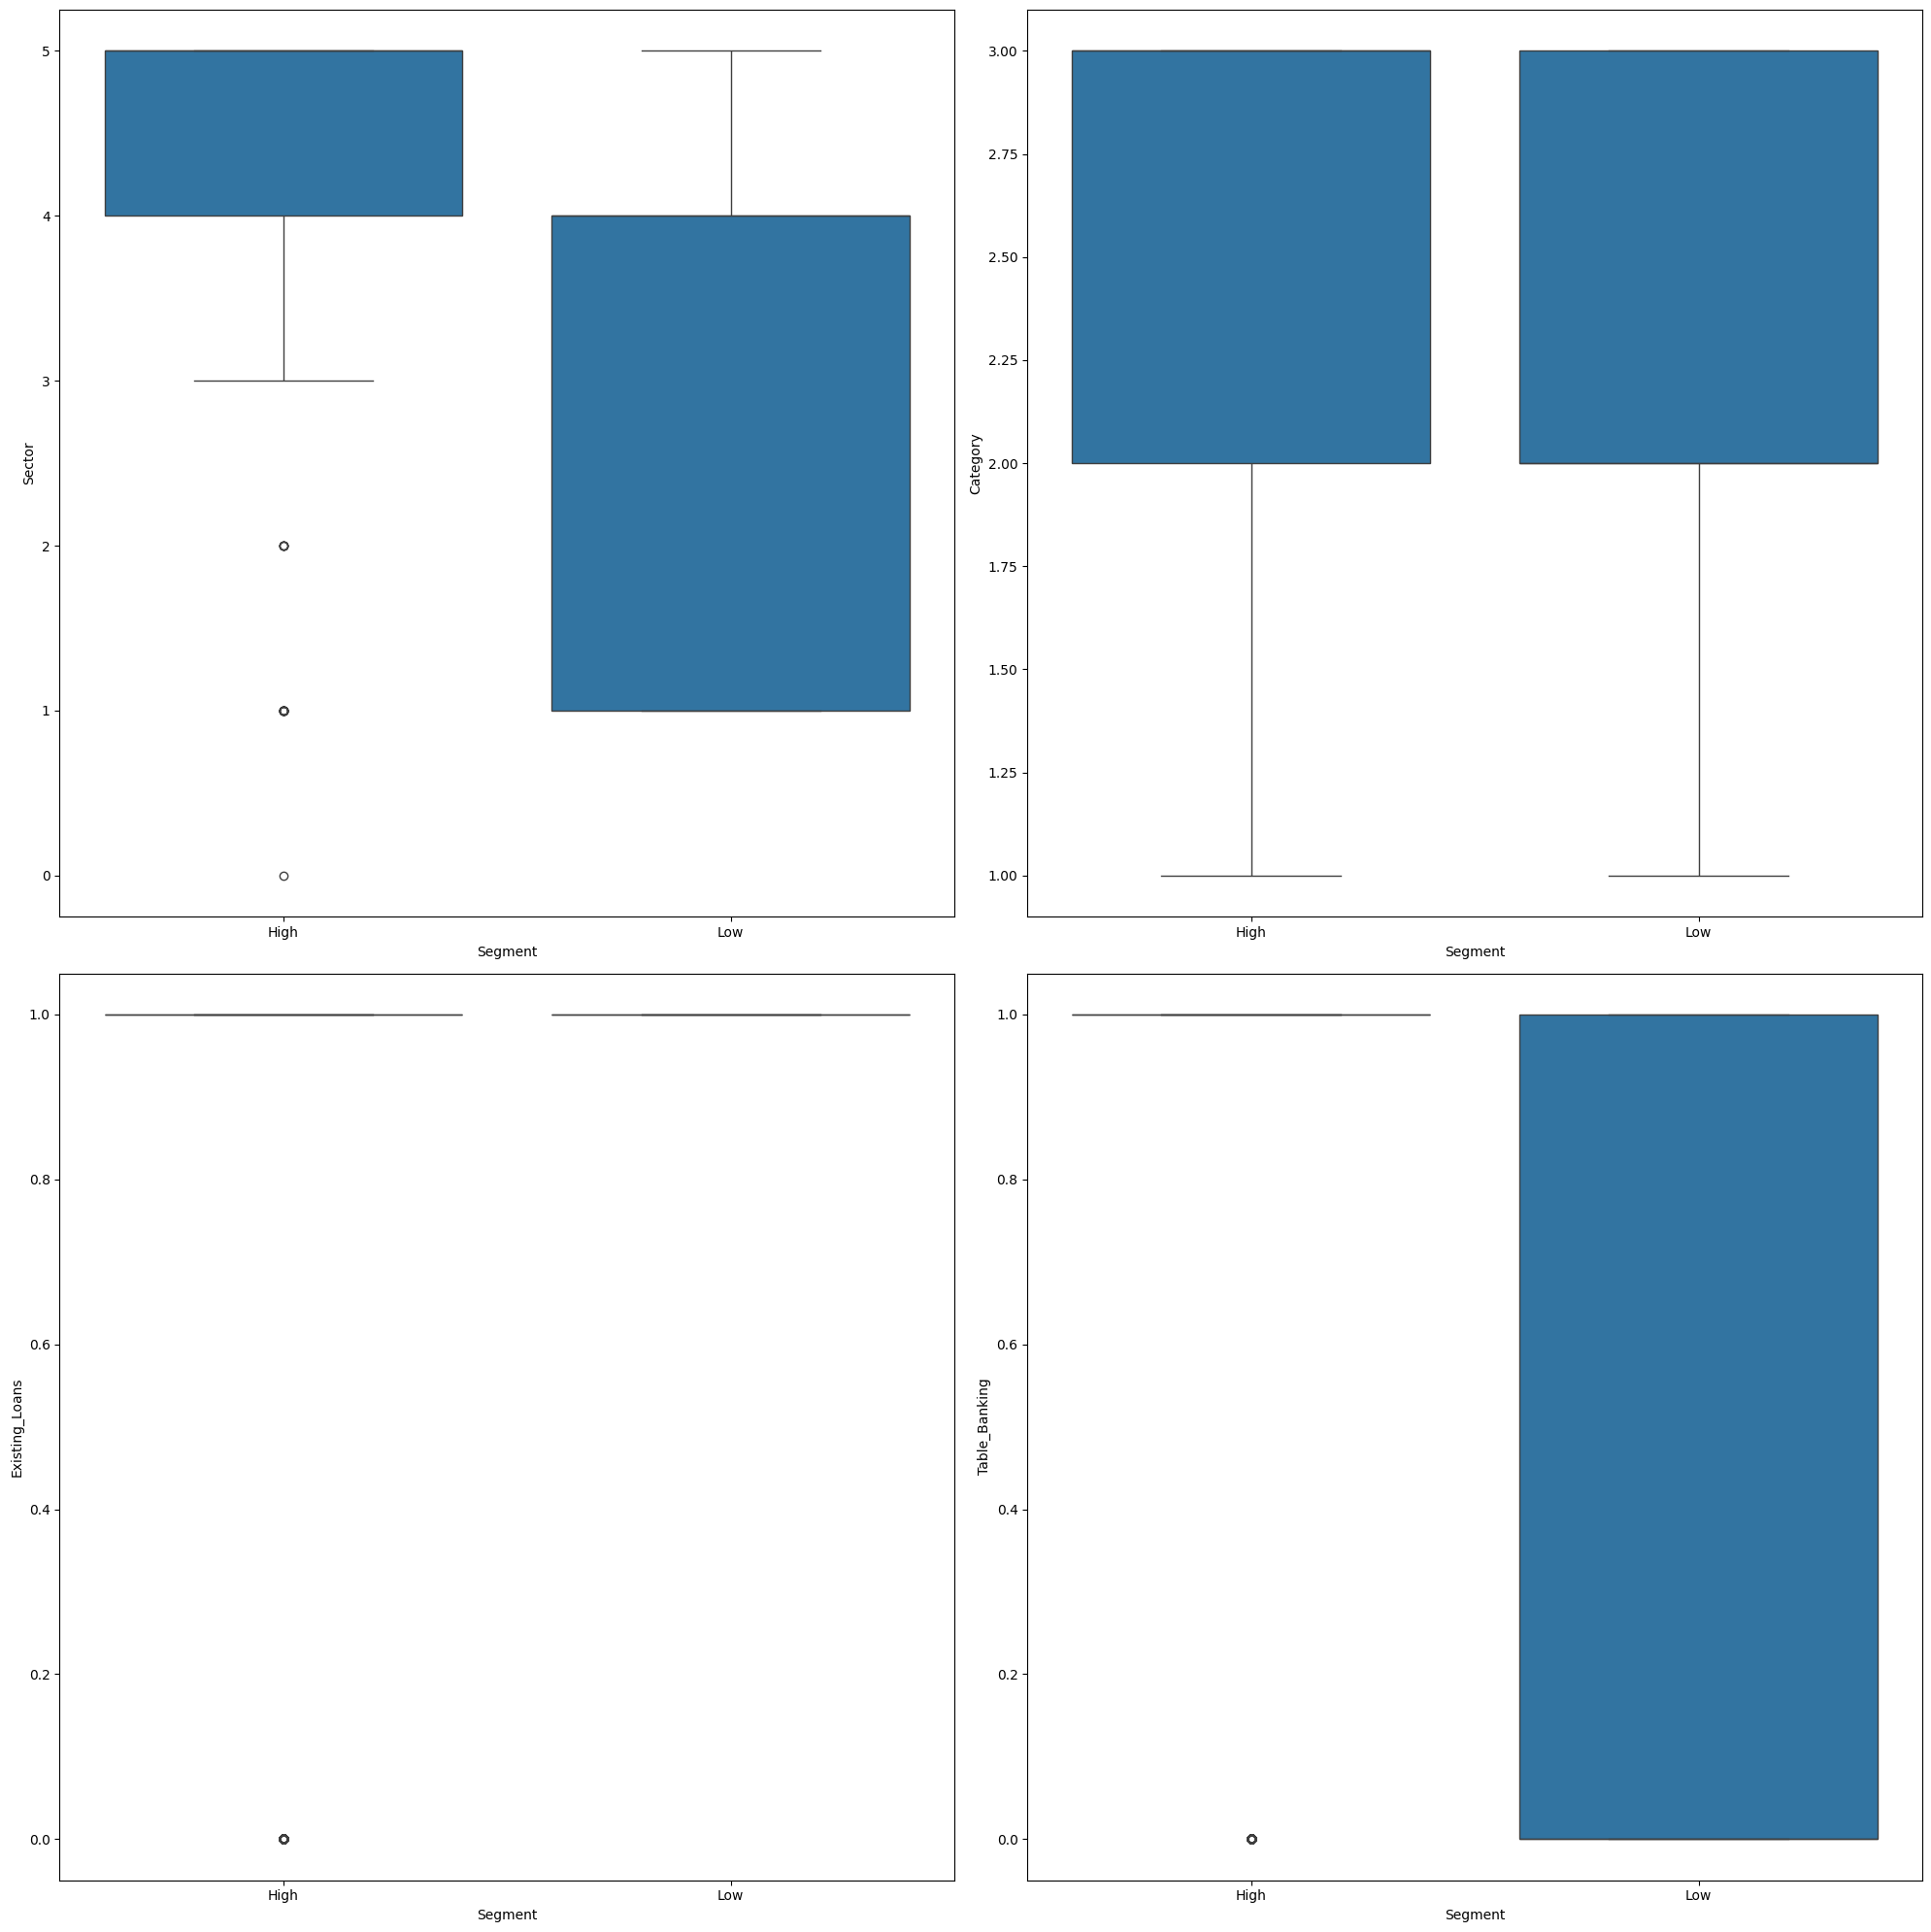

In [ ]:
num_vars = ['Sector','Category','Existing_Loans','Table_Banking']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Segment', data=df2, ax=axs[i])

fig.tight_layout()

plt.show()

**Label Encoding for object datatypes**

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df2.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df2[col].unique()}")

Name: ['Name 1' 'Name 2' 'Name 3' 'Name 4' 'Name 5' 'Name 6' 'Name 7' 'Name 8'
 'Name 9' 'Name 10' 'Name 11' 'Name 12' 'Name 13' 'Name 14' 'Name 15'
 'Name 16' 'Name 17' 'Name 18' 'Name 19' 'Name 20' 'Name 21' 'Name 22'
 'Name 23' 'Name 24' 'Name 25' 'Name 26' 'Name 27' 'Name 28' 'Name 29'
 'Name 30' 'Name 31' 'Name 32' 'Name 33' 'Name 34' 'Name 35' 'Name 36'
 'Name 37' 'Name 38' 'Name 39' 'Name 40' 'Name 41' 'Name 42' 'Name 43'
 'Name 44' 'Name 45' 'Name 46' 'Name 47' 'Name 48' 'Name 49' 'Name 50'
 'Name 51' 'Name 52' 'Name 53' 'Name 54' 'Name 55' 'Name 56' 'Name 57'
 'Name 58' 'Name 59' 'Name 60' 'Name 61' 'Name 62' 'Name 63' 'Name 64'
 'Name 65' 'Name 66' 'Name 67' 'Name 68' 'Name 69' 'Name 70' 'Name 71'
 'Name 72' 'Name 73' 'Name 74' 'Name 75' 'Name 76' 'Name 77' 'Name 78'
 'Name 79' 'Name 80' 'Name 81' 'Name 82' 'Name 83' 'Name 84' 'Name 85'
 'Name 86' 'Name 87' 'Name 88' 'Name 89' 'Name 90' 'Name 91' 'Name 92'
 'Name 93' 'Name 94' 'Name 95' 'Name 96' 'Name 97' 'Name 98' 'Name 99'

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df2.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df2[col].unique())

    # Transform the column using the encoder
    df2[col] = label_encoder.transform(df2[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df2[col].unique()}")

Name: [  0 111 222 333 444 555 666 777 888   1  12  23  34  45  56  67  78  89
 100 112 123 134 145 156 167 178 189 200 211 223 234 245 256 267 278 289
 300 311 322 334 345 356 367 378 389 400 411 422 433 445 456 467 478 489
 500 511 522 533 544 556 567 578 589 600 611 622 633 644 655 667 678 689
 700 711 722 733 744 755 766 778 789 800 811 822 833 844 855 866 877 889
 900 911 919 920 921 922 923 924 925   2   3   4   5   6   7   8   9  10
  11  13  14  15  16  17  18  19  20  21  22  24  25  26  27  28  29  30
  31  32  33  35  36  37  38  39  40  41  42  43  44  46  47  48  49  50
  51  52  53  54  55  57  58  59  60  61  62  63  64  65  66  68  69  70
  71  72  73  74  75  76  77  79  80  81  82  83  84  85  86  87  88  90
  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106 107 108 109
 110 113 114 115 116 117 118 119 120 121 122 124 125 126 127 128 129 130
 131 132 133 135 136 137 138 139 140 141 142 143 144 146 147 148 149 150
 151 152 153 154 155 157 158 159 160 161 162 

**Check for Multicollinearity**

<Axes: >

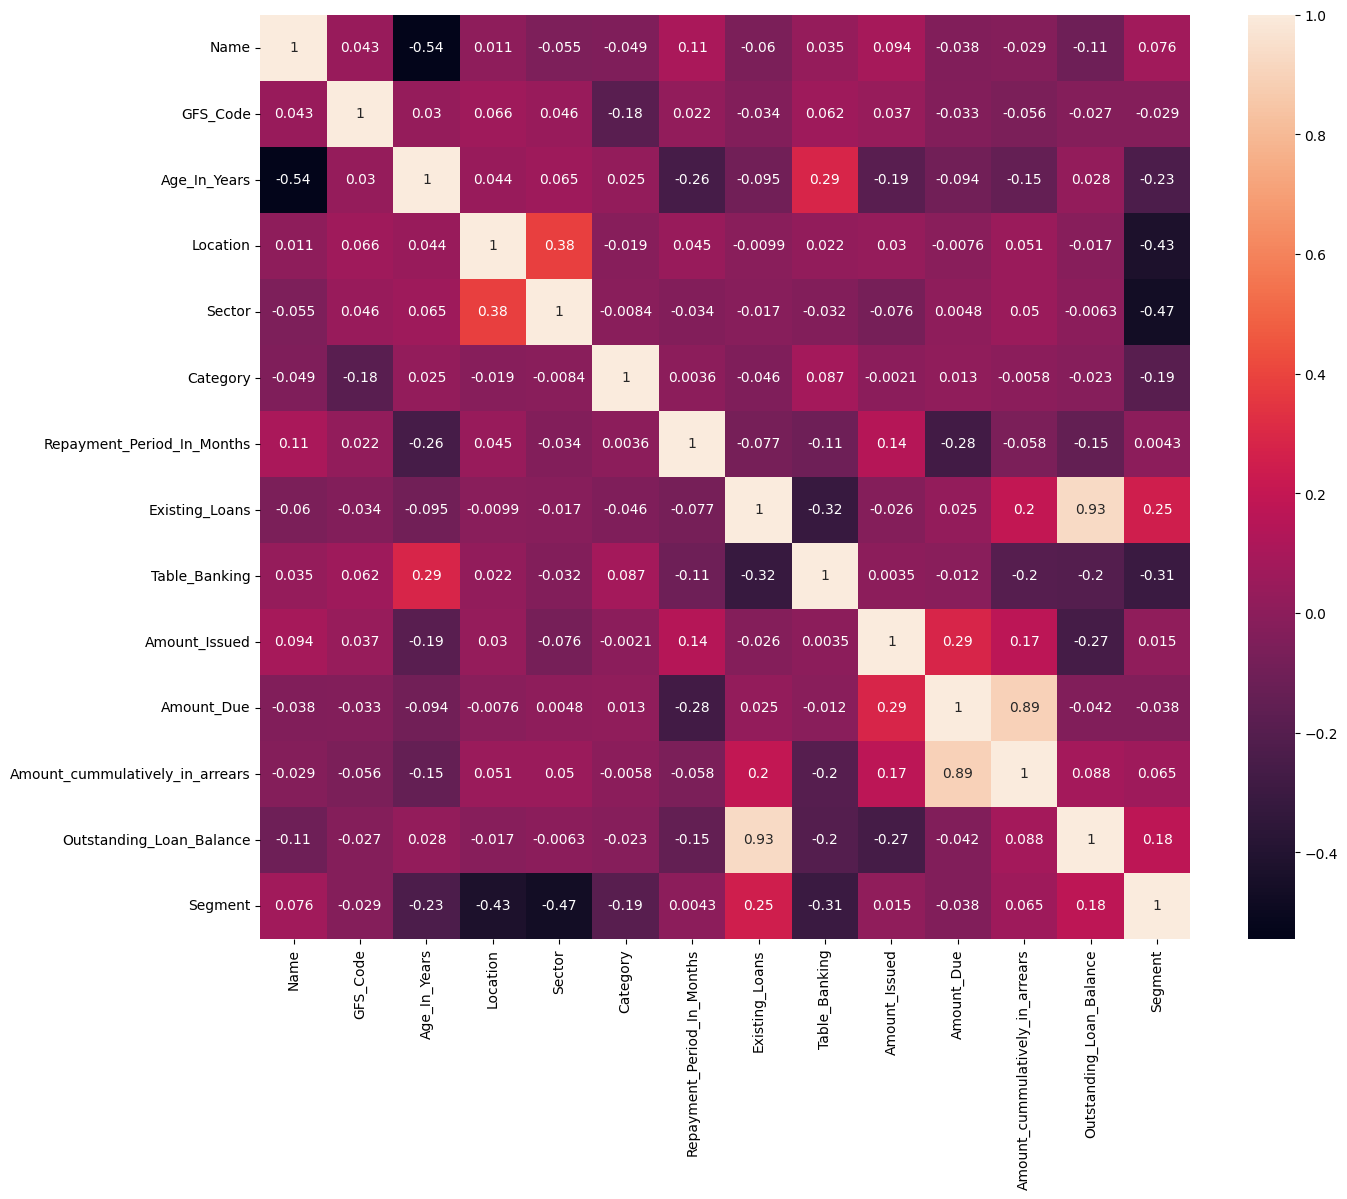

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr(), fmt='.2g', annot=True)

In [ ]:
#Correlation with output variable
cor_matrix = df2.corr()
cor_target = cor_matrix["Segment"]
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Segment    1.0
Name: Segment, dtype: float64

**Train Test Split**

In [ ]:
X = df2.drop(['Segment'], axis=1)
y = df2['Segment']

In [ ]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
from sklearn.model_selection import train_test_split
#split into train_validate_test sets
#train size 70%, validate size 10% and test size 20%
train_ratio = 0.70
test_ratio = 0.20
validation_ratio = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, stratify=df2['Segment'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio), stratify=y_train)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(718, 13)
(90, 13)
(202, 13)
(718,)
(90,)
(202,)


**Data Normalization**

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train

array([[-0.09087017, -0.10564563,  0.55843185, ...,  0.56451416,
         0.12188655,  0.31635621],
       [ 0.16728053, -0.8190459 ,  0.55843185, ..., -0.35747761,
        -0.17365794,  0.88139044],
       [ 0.84445844, -0.66517526, -1.27240865, ..., -0.05014702,
         0.12188655,  0.31635621],
       ...,
       [-0.75682414,  1.73147662,  0.55843185, ...,  0.21876724,
         0.31392022, -0.24867802],
       [-1.52379359, -0.82370865,  0.55843185, ..., -0.11641518,
         0.19116699,  0.31635621],
       [-1.69963537, -0.34344572, -1.27240865, ...,  1.08313453,
         0.42234899, -0.24867802]])

**Logistic** **Regression**

In [ ]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train) #train the model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test data
y_pred = model.predict(X_valid)

# Calculate the performance metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
tpr = recall_score(y_valid, y_pred)
tnr = recall_score(y_valid, y_pred, pos_label =0)
fpr = 1 - tnr
fnr = 1 - tpr
print(f'\n{fpr}')
print(f'\n{fnr}')
print('__'*20)

Accuracy: 0.9333333333333333
Precision: 0.875
Recall: 0.7777777777777778
F1 score: 0.823529411764706

0.02777777777777779

0.2222222222222222
________________________________________


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
tpr = recall_score(y_test, y_pred)
tnr = recall_score(y_test, y_pred, pos_label =0)
fpr = 1 - tnr
fnr = 1 - tpr
print(f'\n{fpr}')
print(f'\n{fnr}')
print('__'*20)

Accuracy: 0.9653465346534653
Precision: 0.9069767441860465
Recall: 0.9285714285714286
F1 score: 0.9176470588235294

0.025000000000000022

0.0714285714285714
________________________________________


**Logistic Regression feature importance**

Feature: 0, Score: -0.23830
Feature: 1, Score: -0.10433
Feature: 2, Score: -1.02606
Feature: 3, Score: -1.55534
Feature: 4, Score: -1.77345
Feature: 5, Score: -1.01049
Feature: 6, Score: -1.33137
Feature: 7, Score: 2.23124
Feature: 8, Score: -0.68078
Feature: 9, Score: 0.03185
Feature: 10, Score: -3.28181
Feature: 11, Score: 2.83931
Feature: 12, Score: -0.33426


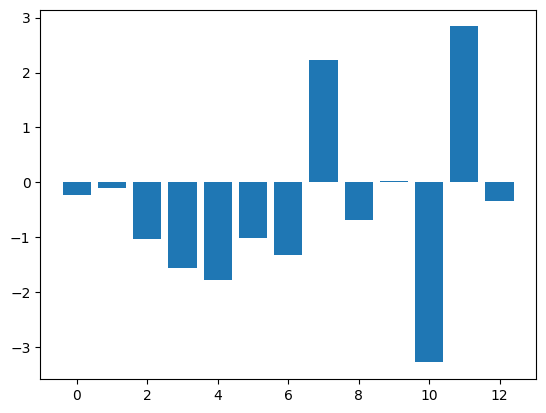

In [ ]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Learning curve for logistic regression**

In [ ]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores, = learning_curve(model, X, y, train_sizes=[150, 300, 560, 700 ])
for train_size, cv_train_scores, cv_test_scores,  in zip(
    train_size_abs, train_scores, test_scores ):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")


150 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.72
300 samples were used to train the model
The average train accuracy is 0.86
The average test accuracy is 0.73
560 samples were used to train the model
The average train accuracy is 0.83
The average test accuracy is 0.79
700 samples were used to train the model
The average train accuracy is 0.83
The average test accuracy is 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Artificial** **Neural** **Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs', alpha=1e-5,
                hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = ann.predict(X_valid)
y_pred

# Calculate the performance metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
tpr = recall_score(y_valid, y_pred)
tnr = recall_score(y_valid, y_pred, pos_label =0)
fpr = 1 - tnr
fnr = 1 - tpr
print(f'\n{fpr}')
print(f'\n{fnr}')
print('__'*20)

Accuracy: 0.9777777777777777
Precision: 0.9
Recall: 1.0
F1 score: 0.9473684210526316

0.02777777777777779

0.0
________________________________________


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test data
y_pred = ann.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
tpr = recall_score(y_test, y_pred)
tnr = recall_score(y_test, y_pred, pos_label =0)
fpr = 1 - tnr
fnr = 1 - tpr
print(f'\n{fpr}')
print(f'\n{fnr}')
print('__'*20)

Accuracy: 0.9801980198019802
Precision: 0.9318181818181818
Recall: 0.9761904761904762
F1 score: 0.9534883720930233

0.018750000000000044

0.023809523809523836
________________________________________


**Learning curve for ANN**

In [ ]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores, = learning_curve(ann, X, y, train_sizes=[150, 300, 560,700 ])
for train_size, cv_train_scores, cv_test_scores,  in zip(
    train_size_abs, train_scores, test_scores ):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of i

150 samples were used to train the model
The average train accuracy is 0.90
The average test accuracy is 0.79
300 samples were used to train the model
The average train accuracy is 0.84
The average test accuracy is 0.78
560 samples were used to train the model
The average train accuracy is 0.83
The average test accuracy is 0.78
700 samples were used to train the model
The average train accuracy is 0.82
The average test accuracy is 0.78


**Support Vector Machine**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = clf.predict(X_valid)
y_pred

# Calculate the performance metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
tpr = recall_score(y_valid, y_pred)
tnr = recall_score(y_valid, y_pred, pos_label =0)
fpr = 1 - tnr
fnr = 1 - tpr
print(f'\n{fpr}')
print(f'\n{fnr}')
print('__'*20)

Accuracy: 0.9666666666666667
Precision: 1.0
Recall: 0.8333333333333334
F1 score: 0.9090909090909091

0.0

0.16666666666666663
________________________________________


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
tpr = recall_score(y_test, y_pred)
tnr = recall_score(y_test, y_pred, pos_label =0)
fpr = 1 - tnr
fnr = 1 - tpr
print(f'\n{fpr}')
print(f'\n{fnr}')
print('__'*20)

Accuracy: 0.9504950495049505
Precision: 0.8809523809523809
Recall: 0.8809523809523809
F1 score: 0.8809523809523809

0.03125

0.11904761904761907
________________________________________


**Learning Curve for SVM**

In [ ]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores, = learning_curve(clf, X, y, train_sizes=[150,300,560,700])
for train_size, cv_train_scores, cv_test_scores,  in zip(
    train_size_abs, train_scores, test_scores ):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

150 samples were used to train the model
The average train accuracy is 0.90
The average test accuracy is 0.79
300 samples were used to train the model
The average train accuracy is 0.84
The average test accuracy is 0.79
560 samples were used to train the model
The average train accuracy is 0.83
The average test accuracy is 0.79
700 samples were used to train the model
The average train accuracy is 0.82
The average test accuracy is 0.79


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = rfc.predict(X_valid)
y_pred

# Calculate the performance metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
tpr = recall_score(y_valid, y_pred)
tnr = recall_score(y_valid, y_pred, pos_label =0)
fpr = 1 - tnr
fnr = 1 - tpr
print(f'\n{fpr}')
print(f'\n{fnr}')
print('__'*20)

Accuracy: 0.9888888888888889
Precision: 1.0
Recall: 0.9444444444444444
F1 score: 0.9714285714285714

0.0

0.05555555555555558
________________________________________


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test data
y_pred = rfc.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
tpr = recall_score(y_test, y_pred)
tnr = recall_score(y_test, y_pred, pos_label =0)
fpr = 1 - tnr
fnr = 1 - tpr
print(f'\n{fpr}')
print(f'\n{fnr}')
print('__'*20)

Accuracy: 0.9603960396039604
Precision: 0.9473684210526315
Recall: 0.8571428571428571
F1 score: 0.9

0.012499999999999956

0.1428571428571429
________________________________________


**Learning Curve for Random Forest**

In [ ]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores, = learning_curve(rfc, X, y, train_sizes=[150,300,560,700])
for train_size, cv_train_scores, cv_test_scores,  in zip(
    train_size_abs, train_scores, test_scores ):
  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")


150 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.85
300 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.90
560 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.90
700 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.91
